<a href="https://colab.research.google.com/github/mmandal-scageon/ML-Workshop/blob/main/Patient_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering for Patient Stratification


# Import necessary libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Pima Indians Diabetes Dataset
1. Find the dataset shape
2. Find the dataset summary

In [ ]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"

column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(url, names=column_names)

print("Dataset Shape:", data.shape)
print("\nFirst 5 patients:")
print(data.head())

print("\nDataset Summary:")
print(data.describe())

Dataset Shape: (768, 9)

First 5 patients:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Dataset Summary:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.36

# Check for diabetes distribution

In [ ]:
print(f"\nDiabetes Cases: {data['Outcome'].sum()}")
print(f"Non-Diabetes Cases: {len(data) - data['Outcome'].sum()}")
print(f"Diabetes Rate: {data['Outcome'].mean():.1%}")


Diabetes Cases: 268
Non-Diabetes Cases: 500
Diabetes Rate: 34.9%


# Focus on key clinical features for clustering

In [ ]:
clustering_features = ['Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction']
X_cluster = data[clustering_features].copy()

print("Features for Clustering:")
print(X_cluster.describe())

Features for Clustering:
          Glucose         BMI         Age  DiabetesPedigreeFunction
count  768.000000  768.000000  768.000000                768.000000
mean   120.894531   31.992578   33.240885                  0.471876
std     31.972618    7.884160   11.760232                  0.331329
min      0.000000    0.000000   21.000000                  0.078000
25%     99.000000   27.300000   24.000000                  0.243750
50%    117.000000   32.000000   29.000000                  0.372500
75%    140.250000   36.600000   41.000000                  0.626250
max    199.000000   67.100000   81.000000                  2.420000


#Visualization of features

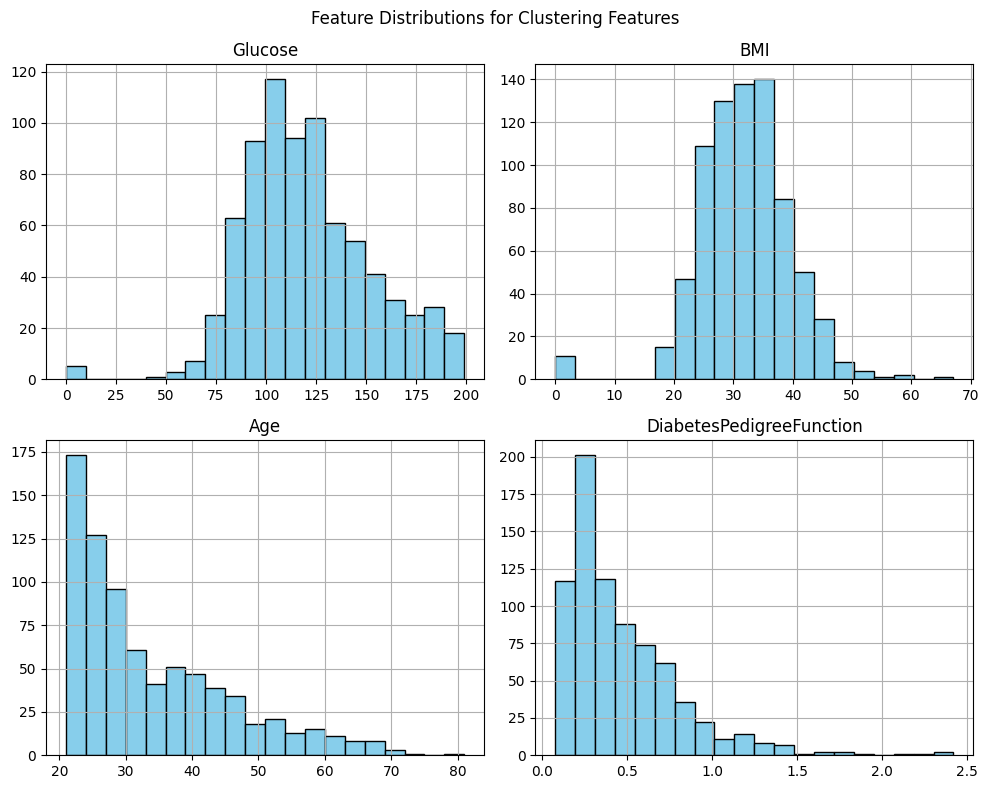

In [ ]:
X_cluster.hist(figsize=(10, 8), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Feature Distributions for Clustering Features')
plt.tight_layout()
plt.show()


# Standardize features (important for clustering)

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

print("\nWhy standardize? Different units:")
print("• Glucose: ~120 mg/dL")
print("• BMI: ~30 kg/m²")
print("• Age: ~30 years")
print("• DiabetesPedigreeFunction: ~0.5")


Why standardize? Different units:
• Glucose: ~120 mg/dL
• BMI: ~30 kg/m²
• Age: ~30 years
• DiabetesPedigreeFunction: ~0.5


# Determine optimal number of clusters
# The "Elbow Method" - like finding the right number of disease subtypes


In [ ]:
inertias = []
K_range = range(1, 8)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Plot the elbow curve

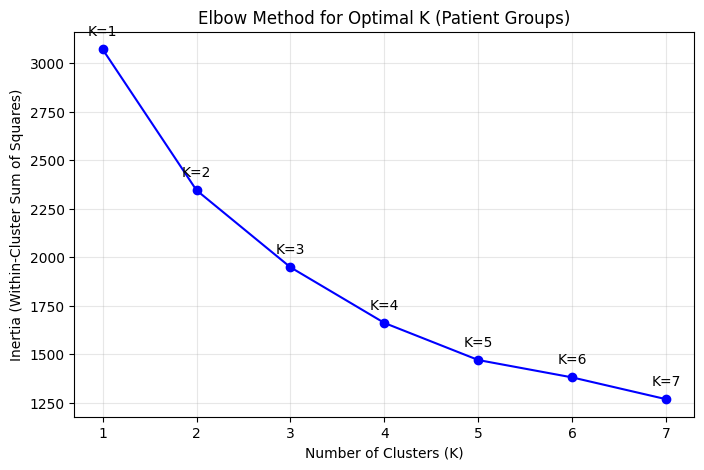

Look for the 'elbow' - the point where improvement slows down.
This suggests the optimal number of patient groups (clusters).


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertias, marker='o', linestyle='-', color='blue')  # Plotting the points and line

# Annotate each point
for i, (k, inertia) in enumerate(zip(K_range, inertias)):
    plt.annotate(f'K={k}', (k, inertia), textcoords="offset points",
                 xytext=(0, 10), ha='center')

plt.title('Elbow Method for Optimal K (Patient Groups)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.grid(True, alpha=0.3)
plt.show()

print("Look for the 'elbow' - the point where improvement slows down.")
print("This suggests the optimal number of patient groups (clusters).")


# Apply K-Means with optimal clusters (let's use K=3)


In [ ]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to original data


/tmp/ipython-input-17-1637290136.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')


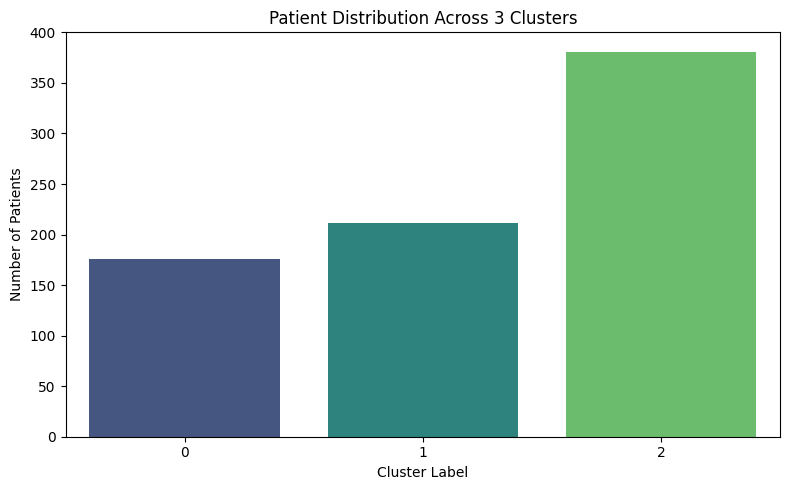

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cluster_counts = data_clustered['Cluster'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')
plt.xlabel('Cluster Label')
plt.ylabel('Number of Patients')
plt.title(f'Patient Distribution Across {n_clusters} Clusters')
plt.tight_layout()
plt.show()


# Analyze Clinical Characteristics of Each Cluster

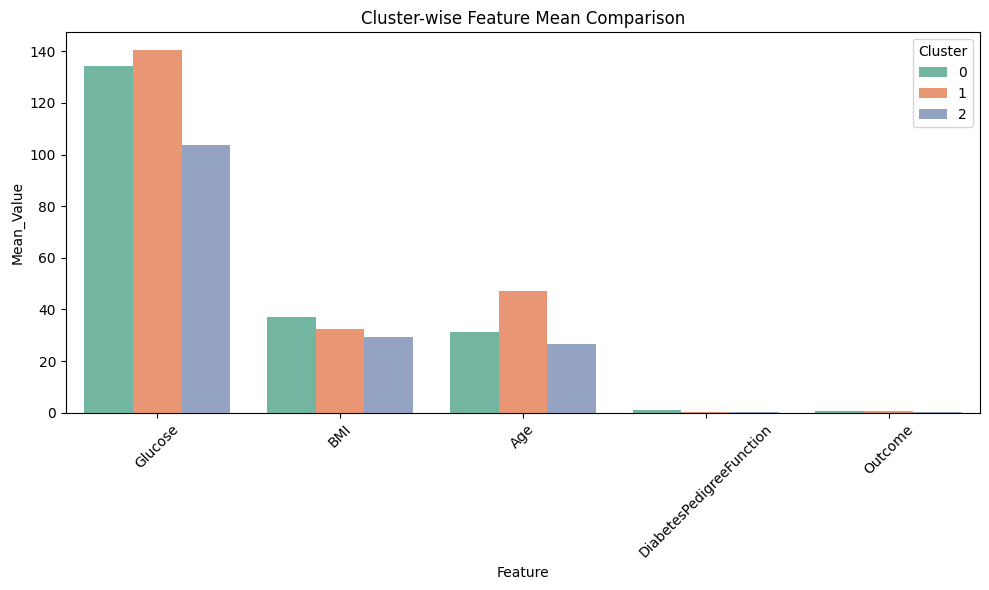

In [ ]:
cluster_summary_plot = cluster_summary.reset_index().melt(id_vars='Cluster', var_name='Feature', value_name='Mean_Value')

plt.figure(figsize=(10, 6))
sns.barplot(x='Feature', y='Mean_Value', hue='Cluster', data=cluster_summary_plot, palette='Set2')
plt.title('Cluster-wise Feature Mean Comparison')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Visualize cluster characteristics

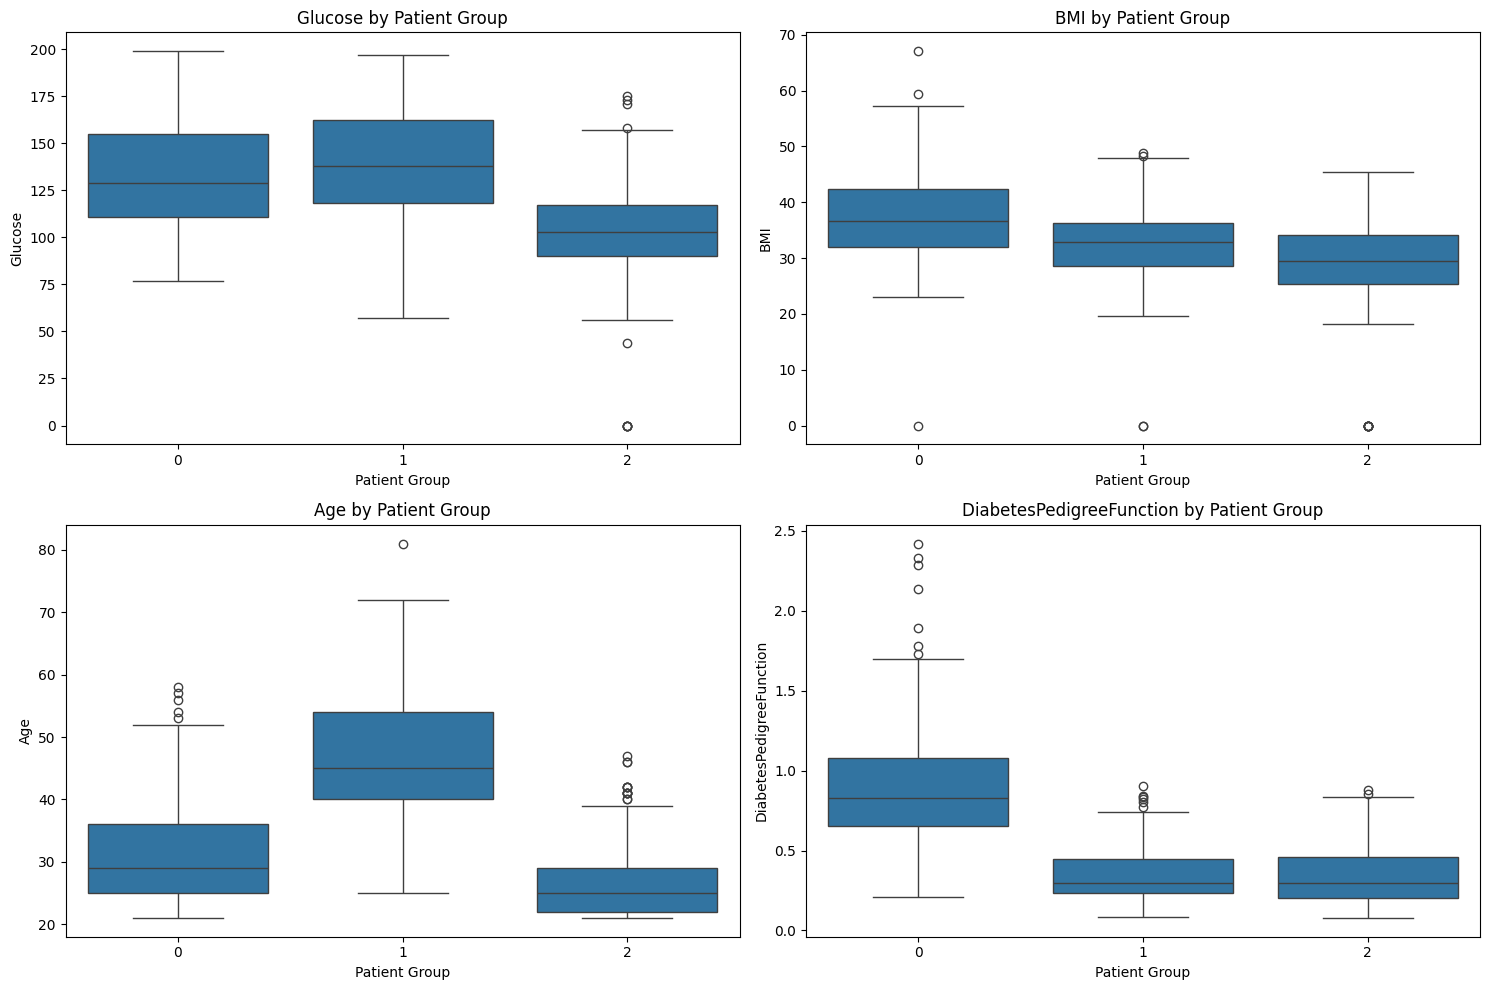

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
features_to_plot = clustering_features

for i, feature in enumerate(features_to_plot):
    row = i // 2
    col = i % 2

    sns.boxplot(data=data_clustered, x='Cluster', y=feature, ax=axes[row, col])
    axes[row, col].set_title(f'{feature} by Patient Group')
    axes[row, col].set_xlabel('Patient Group')

plt.tight_layout()
plt.show()

# Clinical Interpretation of Clusters

In [ ]:
print("CLINICAL INTERPRETATION OF PATIENT GROUPS:")
print("=" * 50)

for cluster in range(n_clusters):
    cluster_data = data_clustered[data_clustered['Cluster'] == cluster]
    diabetes_rate = cluster_data['Outcome'].mean()

    avg_glucose = cluster_data['Glucose'].mean()
    avg_bmi = cluster_data['BMI'].mean()
    avg_age = cluster_data['Age'].mean()
    avg_family_risk = cluster_data['DiabetesPedigreeFunction'].mean()

    print(f"\nPATIENT GROUP {cluster}:")
    print(f"• Size: {len(cluster_data)} patients")
    print(f"• Diabetes Rate: {diabetes_rate:.1%}")
    print(f"• Average Glucose: {avg_glucose:.1f} mg/dL")
    print(f"• Average BMI: {avg_bmi:.1f}")
    print(f"• Average Age: {avg_age:.1f} years")
    print(f"• Family Risk Score: {avg_family_risk:.3f}")

CLINICAL INTERPRETATION OF PATIENT GROUPS:

PATIENT GROUP 0:
• Size: 176 patients
• Diabetes Rate: 56.2%
• Average Glucose: 134.4 mg/dL
• Average BMI: 37.2
• Average Age: 31.4 years
• Family Risk Score: 0.888

PATIENT GROUP 1:
• Size: 211 patients
• Diabetes Rate: 54.0%
• Average Glucose: 140.4 mg/dL
• Average BMI: 32.4
• Average Age: 47.1 years
• Family Risk Score: 0.357

PATIENT GROUP 2:
• Size: 381 patients
• Diabetes Rate: 14.4%
• Average Glucose: 103.9 mg/dL
• Average BMI: 29.3
• Average Age: 26.4 years
• Family Risk Score: 0.343


   
  # Clinical recommendations

In [ ]:
    if diabetes_rate > 0.6:
        print(f"• RECOMMENDATION: High-risk group - intensive monitoring")
    elif diabetes_rate > 0.3:
        print(f"• RECOMMENDATION: Moderate-risk - regular screening")
    else:
        print(f"• RECOMMENDATION: Low-risk - standard prevention")

• RECOMMENDATION: Low-risk - standard prevention


# Visualize diabetes rate by cluster

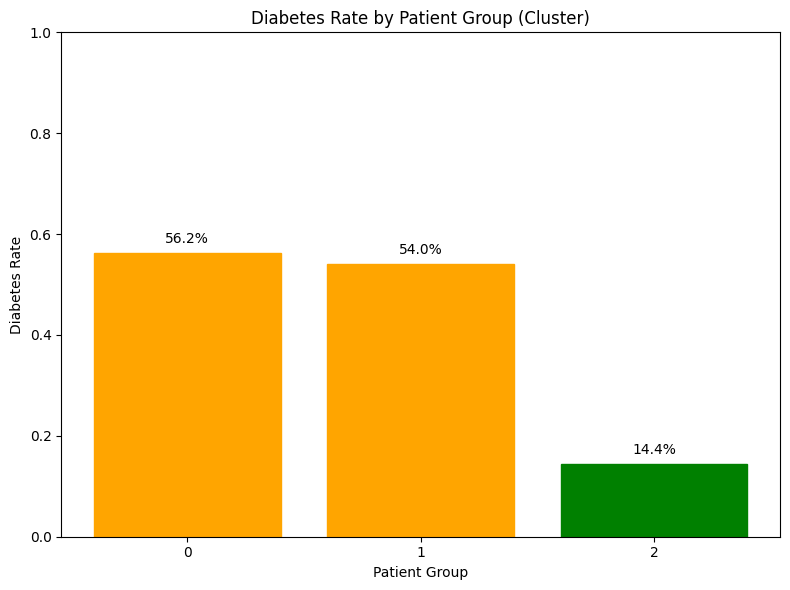

In [ ]:
import matplotlib.pyplot as plt

# Calculate diabetes rate for each cluster
diabetes_by_cluster = data_clustered.groupby('Cluster')['Outcome'].mean()

# Set up plot
plt.figure(figsize=(8, 6))
bars = plt.bar(diabetes_by_cluster.index, diabetes_by_cluster.values)

# Color coding based on diabetes rate thresholds
colors = ['green' if rate < 0.3 else 'orange' if rate < 0.6 else 'red'
          for rate in diabetes_by_cluster.values]

for bar, color in zip(bars, colors):
    bar.set_color(color)

# Add labels and title
plt.title('Diabetes Rate by Patient Group (Cluster)')
plt.xlabel('Patient Group')
plt.ylabel('Diabetes Rate')
plt.ylim(0, 1)
plt.xticks(diabetes_by_cluster.index)

# Optional: Add percentage text on top of each bar
for i, rate in enumerate(diabetes_by_cluster.values):
    plt.text(i, rate + 0.02, f"{rate:.1%}", ha='center')

plt.tight_layout()
plt.show()


Exercise Tasks for Students:


1. Interpret the elbow plot: How many patient groups make sense?

2. Analyze cluster profiles: What characterizes each group?

3. Clinical recommendations: How would you manage each group differently?

4. Resource planning: Which group needs most attention?


